### 环境配置

In [1]:
# 下载 PaddleClas，如果访问 GitHub 网速较慢，可以从 Gitee 下载
# !git clone https://hub.fastgit.org/PaddlePaddle/PaddleClas
!git clone https://gitee.com/paddlepaddle/PaddleClas.git -b release/2.3

Cloning into 'PaddleClas'...
remote: Enumerating objects: 23345, done.
remote: Counting objects: 100% (3228/3228), done.
remote: Compressing objects: 100% (1260/1260), done.


In [8]:
# 安装 Python 依赖库
!pip install pip -U 
!cd /home/aistudio/PaddleClas && pip install -r requirements.txt -Uq

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 快速图像识别体验

In [3]:
# 解压模型
%cd ~/PaddleClas/deploy
!mkdir models
!cd models && wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar && tar -xf picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar
!cd models && wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/general_PPLCNet_x2_5_lite_v1.0_infer.tar && tar -xf general_PPLCNet_x2_5_lite_v1.0_infer.tar
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/data/drink_dataset_v1.0.tar && tar -xf drink_dataset_v1.0.tar

/home/aistudio/PaddleClas/deploy
--2022-01-04 14:42:33--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 100.67.200.6
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|100.67.200.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30638080 (29M) [application/x-tar]
Saving to: ‘picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar’

picodet_PPLCNet_x2_ 100%[===================>]  29.22M   102MB/s    in 0.3s    

2022-01-04 14:42:33 (102 MB/s) - ‘picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar’ saved [30638080/30638080]

--2022-01-04 14:42:34--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/general_PPLCNet_x2_5_lite_v1.0_infer.tar
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-n

In [ ]:
# 识别单张图像
!python python/predict_system.py -c configs/inference_general.yaml

2022-01-04 14:43:57 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-01-04 14:43:57 INFO: DetPostProcess : 
2022-01-04 14:43:57 INFO: DetPreProcess : 
2022-01-04 14:43:57 INFO:     transform_ops : 
2022-01-04 14:43:57 INFO:         DetResize : 
2022-01-04 14:43:57 INFO:             interp : 2
2022-01-04 14:43:57 INFO:             keep_ratio : False
2022-01-04 14:43:57 INFO:             target_size : [640, 640]
2022-01-04 14:43:57 INFO:         DetNormalizeImage : 
2022-01-04 14:43:57 INFO:             is_scale : True
2022-01-04 14:43:57 INFO:             mean : [0.485, 0.456, 0.406]
2022-01-04 14:43:57 INFO:             std : [0.229, 0.224, 0.225]
2022-01-04 14:43:57 INFO:         DetPermute : 
2022-01-04 14:43:57 INFO: Global

/home/aistudio/PaddleClas/deploy


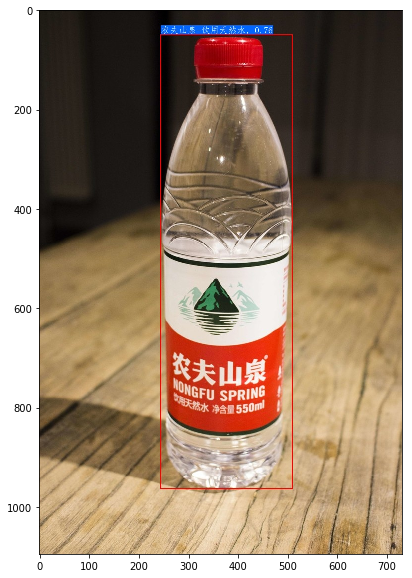

In [2]:
# 结果可视化
%cd ~/PaddleClas/deploy
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./output/nongfu_spring.jpeg')
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 批量识别文件夹中图像
!python python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="./drink_dataset_v1.0/test_images/"

2022-01-04 15:47:11 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-01-04 15:47:11 INFO: DetPostProcess : 
2022-01-04 15:47:11 INFO: DetPreProcess : 
2022-01-04 15:47:11 INFO:     transform_ops : 
2022-01-04 15:47:11 INFO:         DetResize : 
2022-01-04 15:47:11 INFO:             interp : 2
2022-01-04 15:47:11 INFO:             keep_ratio : False
2022-01-04 15:47:11 INFO:             target_size : [640, 640]
2022-01-04 15:47:11 INFO:         DetNormalizeImage : 
2022-01-04 15:47:11 INFO:             is_scale : True
2022-01-04 15:47:11 INFO:             mean : [0.485, 0.456, 0.406]
2022-01-04 15:47:11 INFO:             std : [0.229, 0.224, 0.225]
2022-01-04 15:47:11 INFO:         DetPermute : 
2022-01-04 15:47:11 INFO: Global

### 未知类别的图像识别

In [4]:
# 由于图像标签未在检索库中，识别结果为空
# !python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="./drink_dataset_v1.0/test_images/mosilian.jpeg"
# 建立新的索引
!python3.7 python/build_gallery.py -c configs/build_general.yaml -o IndexProcess.data_file="./drink_dataset_v1.0/gallery/drink_label_all.txt" -o IndexProcess.index_dir="./drink_dataset_v1.0/index_all"
# 使用下面的命令使用 GPU 进行预测，如果希望使用 CPU 预测，可以在命令后面添加 -o Global.use_gpu=False
!python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="./drink_dataset_v1.0/test_images/mosilian.jpeg" -o IndexProcess.index_dir="./drink_dataset_v1.0/index_all"


2022-01-04 19:29:36 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-01-04 19:29:36 INFO: Global : 
2022-01-04 19:29:36 INFO:     batch_size : 32
2022-01-04 19:29:36 INFO:     cpu_num_threads : 10
2022-01-04 19:29:36 INFO:     enable_benchmark : True
2022-01-04 19:29:36 INFO:     enable_mkldnn : True
2022-01-04 19:29:36 INFO:     enable_profile : False
2022-01-04 19:29:36 INFO:     gpu_mem : 8000
2022-01-04 19:29:36 INFO:     ir_optim : True
2022-01-04 19:29:36 INFO:     rec_inference_model_dir : ./models/general_PPLCNet_x2_5_lite_v1.0_infer
2022-01-04 19:29:36 INFO:     use_fp16 : False
2022-01-04 19:29:36 INFO:     use_gpu : True
2022-01-04 19:29:36 INFO:     use_tensorrt : False
2022-01-04 19:29:36 INFO: IndexProcess : 
202

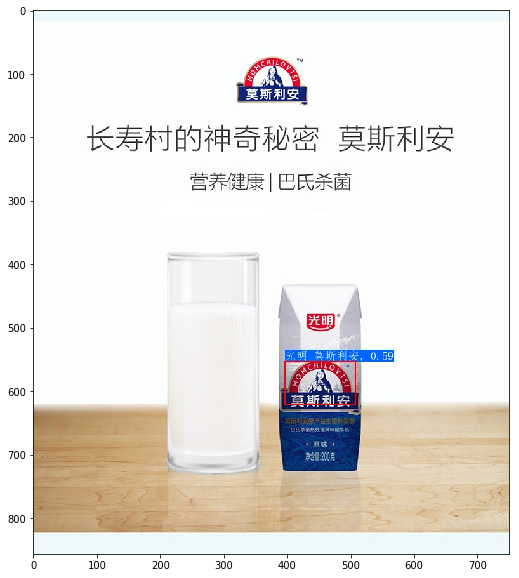

In [6]:
# 结果可视化
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./output/mosilian.jpeg')
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()